In [1]:

# these imports let you use opencv
import cv2 #opencv itself
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

In [2]:
input_image=cv2.imread('noidea.jpg')

In [3]:
print(input_image.dtype)

uint8


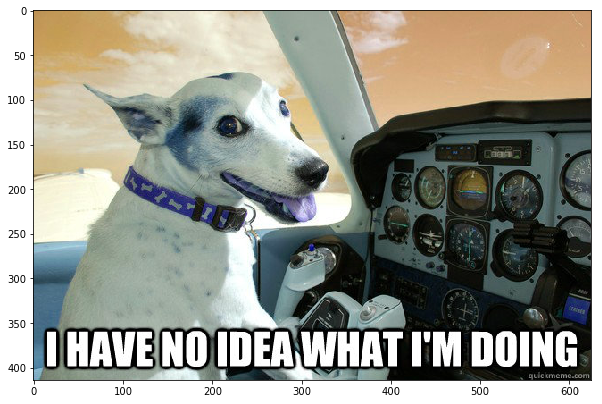

In [4]:
plt.imshow(input_image)

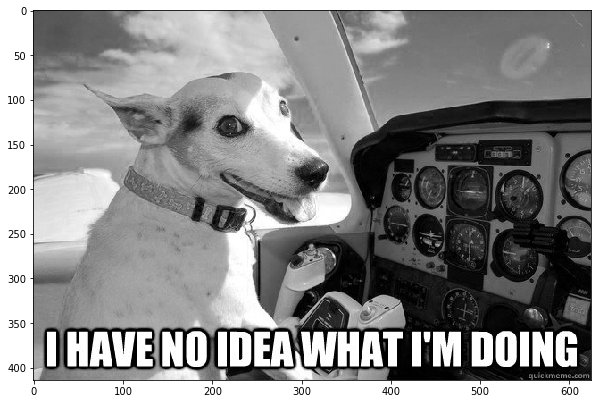

In [5]:
b,g,r= cv2.split(input_image)
plt.imshow(r,cmap='gray')

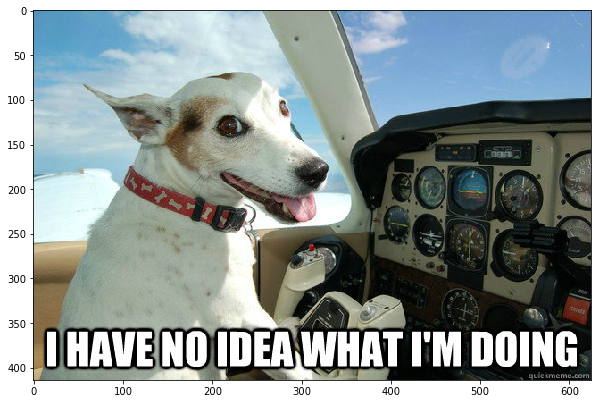

In [6]:
merged= cv2.merge([r,g,b])
plt.imshow(merged)

In [7]:
COLORflags = [flag for flag in dir(cv2) if flag.startswith('COLOR') ]
print(len(COLORflags))

287


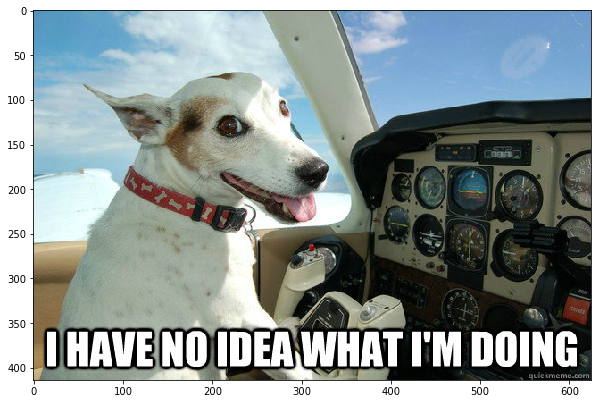

In [8]:
opencv_merged=cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)
plt.imshow(opencv_merged)

In [9]:
pixel = input_image[100,100]
print(pixel)

[150 161 153]


In [10]:
input_image[100,100] = [0,0,0]
pixelnew = input_image[100,100]
print(pixelnew)

[0 0 0]


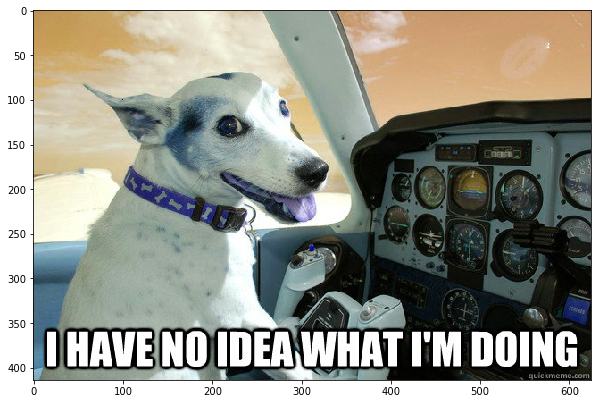

In [11]:
plt.imshow(input_image)

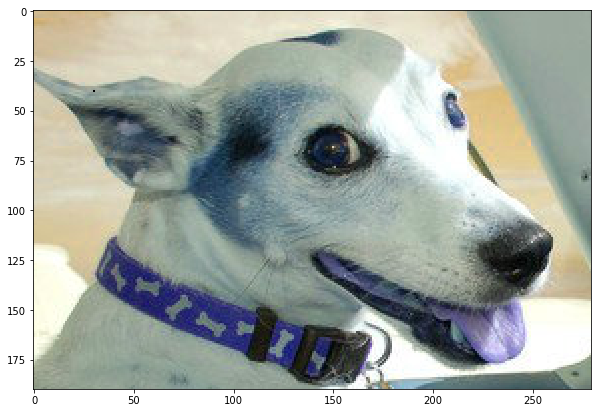

In [12]:
dogface = input_image[60:250, 70:350]
plt.imshow(dogface)

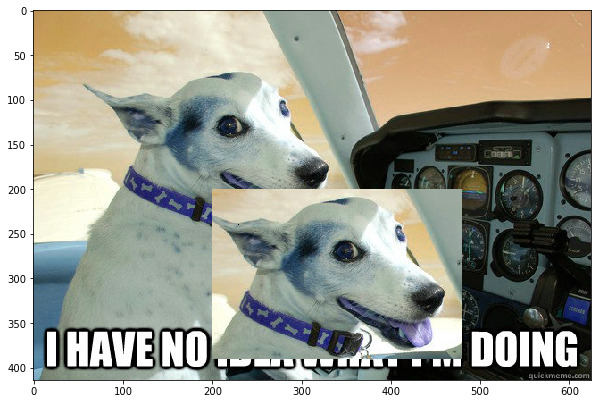

In [13]:
fresh_image=cv2.imread('noidea.jpg') # it's either start with a fresh read of the image, 
                                  # or end up with dogfaces on dogfaces on dogfaces 
                                   # as you re-run parts of the notebook but not others... 
                            
fresh_image[200:200+dogface.shape[0], 200:200+dogface.shape[1]]=dogface
plt.imshow(fresh_image)

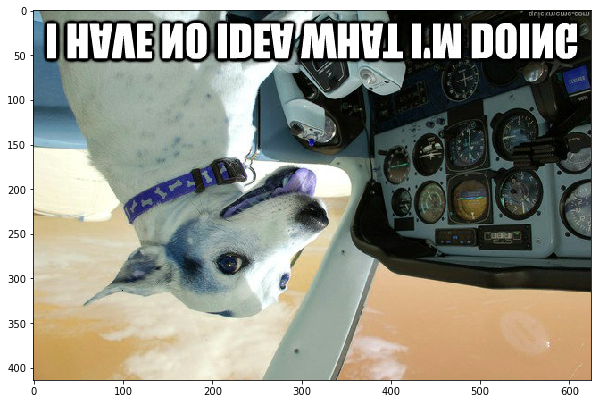

In [15]:
flipped= cv2.flip(input_image,0)
plt.imshow(flipped)

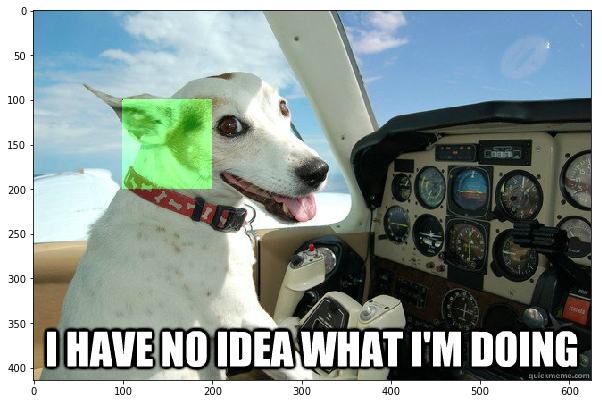

In [20]:
blank_image = np.zeros((input_image.shape), np.uint8)

blank_image[100:200,100:200,1]=100; #give it a green square
plt.imshow(blank_image)
new_image=cv2.add(blank_image,input_image) # add the two images together

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

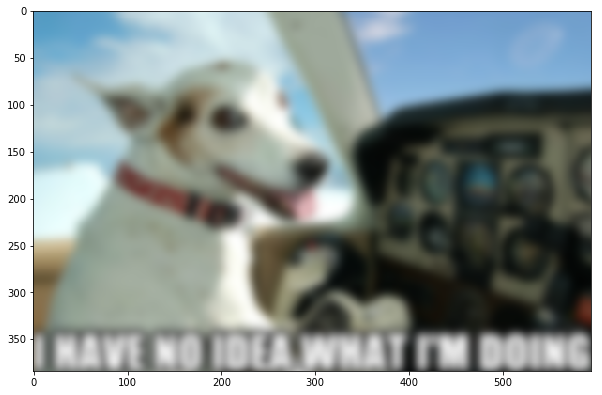

In [21]:
d=15
img_blur15 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur15, cv2.COLOR_BGR2RGB))

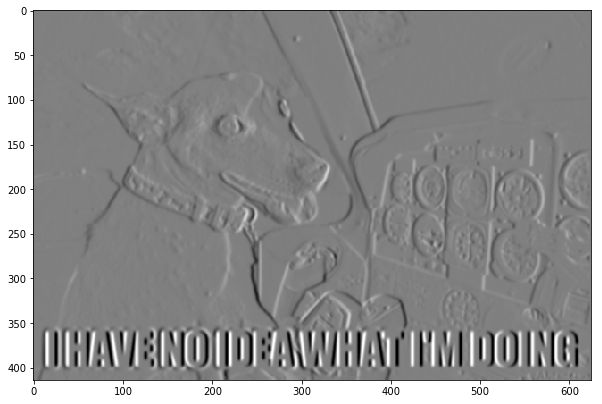

In [26]:
sobelimage=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
sobelx= cv2.Sobel(sobelimage,cv2.CV_64F,1,0,ksize=9)
sobely= cv2.Sobel(sobelimage,cv2.CV_64F,0,1,ksize=9)
plt.imshow(sobelx,cmap='gray')

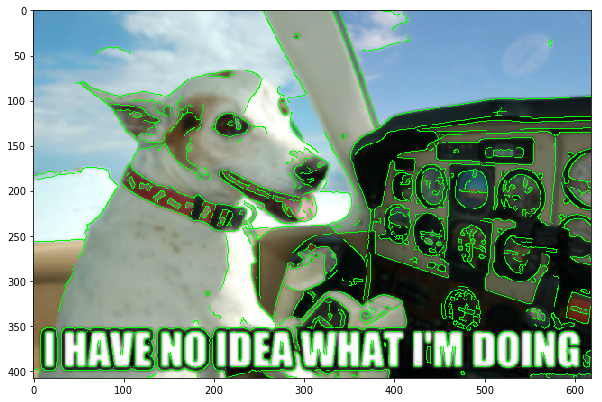

In [33]:
th1=30
th2=90
d=3

edgeresult = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(gray, th1, th2)

edgeresult[edge != 0] = (0, 255, 0) # this takes pixels in edgeresult where edge non-zero colours them bright green

plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))

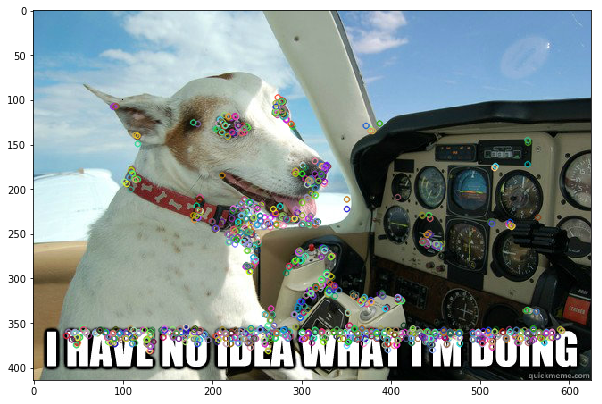

In [36]:

orbimg= cv2.ORB_create()
kp= orbimg.detect(input_image,None)
kp,des=orbimg.compute(input_image,kp)
cv2.drawKeypoints(input_image,kp,input_image)

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))

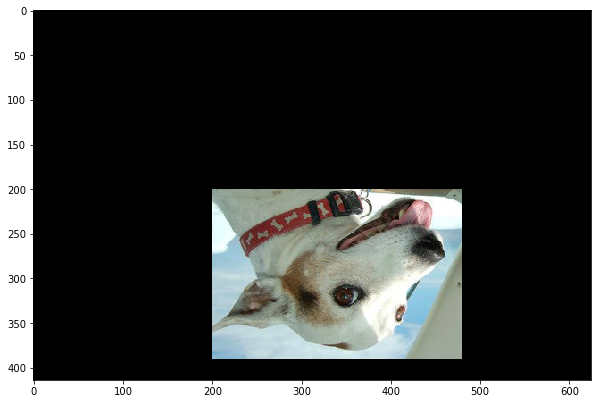

In [41]:
input_image=cv2.imread('noidea.jpg')
img2match=np.zeros(input_image.shape,np.uint8)
dogface=input_image[60:250, 70:350]
dogface=cv2.flip(dogface,0)
# img2match[60:250, 70:350]=[0,0,0]
# plt.imshow(img2match)
img2match[200:200+dogface.shape[0], 200:200+dogface.shape[1]]=dogface # paste it back somewhere else
plt.imshow(cv2.cvtColor(img2match, cv2.COLOR_BGR2RGB))

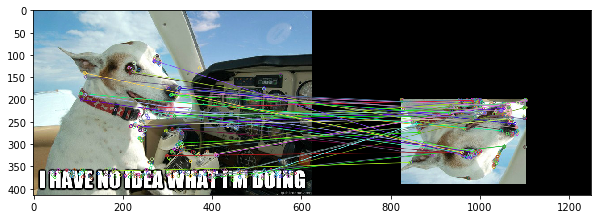

In [43]:
kp2 = orbimg.detect(img2match,None)
# compute the descriptors with ORB
kp2, des2 = orbimg.compute(img2match, kp2)
# create BFMatcher object: this is a Brute Force matching object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des,des2)

# Sort them by distance between matches in feature space - so the best matches are first.
matches = sorted(matches, key = lambda x:x.distance)
 
# Draw first 50 matches.
oimg = cv2.drawMatches(input_image,kp,img2match,kp2,matches[:50], input_image)
 
plt.imshow(cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB))